# Lab 4

# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset Generation

In [2]:
def getDataset(mode):
    np.random.seed(2020)
    n = 20
    f = np.sort(np.random.randint(n,n*10,size=(n,)))
    s = f-np.sort(np.random.randint(1,n,size=(n,)))
    if mode=='dp':
        ss = np.zeros(n+2)
        ff = np.zeros(n+2)
        ss[1:-1]=s
        ff[1:-1]=f
        ss[0]=ff[0]=ss[1]
        ss[n+1]=ff[n+1]=ff[n]
        return n,ss,ff
    else:
        return n,s,f

# Visualization
The red intervals are the ones we need in the end. The blue ones, nevertheless, are those we do not require. To view it easier, I drew yellow lines to combine these red intervals.

In [3]:
def visulization_activity(result,desp):
    plt.figure(figsize=(10,7))
    plt.grid()
    if desp=='dp':
        for i in range(1,n+1):
            if i in result:
                plt.plot([i,i],[s[i],f[i]],c='darkred')
            else:
                plt.plot([i,i],[s[i],f[i]],c='b')
        for i in range(len(result)-1):
            plt.plot([result[i],result[i+1]],[f[result[i]],s[result[i+1]]],c='yellow')
        plt.xlabel('Interval Index')
        plt.ylabel('Value')
        plt.savefig(desp+'_result.jpg')
        plt.show()
    else:
        for i in range(n):
            if i in result:
                plt.plot([i,i],[s[i],f[i]],c='darkred')
            else:
                plt.plot([i,i],[s[i],f[i]],c='b')
        for i in range(len(result)-1):
            plt.plot([result[i],result[i+1]],[f[result[i]],s[result[i+1]]],c='yellow')
        plt.xlabel('Interval Index')
        plt.ylabel('Value')
        plt.savefig(desp+'_result.jpg')
        plt.show()

# Algorithm

## Dynamic Programming

In [4]:
n,s,f = getDataset(mode='dp')

dp = np.zeros((n+2,n+2),dtype=int)
res = np.zeros((n+2,n+2),dtype=int)


def get_result(s,f,i,j,res,S):
    if res[i][j]==0:
        return S
    key = res[i][j]
    K = S.union({key})
    return get_result(s,f,i,key,res,K).union(get_result(s,f,key,j,res,K))
    
def activity_selection_dp(s,f,n):
    for k in range(2,n+2):
        for i in range(n-k+2):
            j = i + k
            pos = -1
            for t in range(i+1,j):
                if s[t]>=f[i] and f[t]<=s[j]:
                    if dp[i][t]+dp[t][j]+1>dp[i][j]:
                        dp[i][j]=dp[i][t]+dp[t][j]+1
                        pos = t
            if(pos!=-1):
                res[i][j]=pos
#     print(res)
    S = {0,n+1}
    S = get_result(s,f,0,n+1,res,S)
    return sorted(list(S-{0,n+1}))


In [5]:
result_dp = activity_selection_dp(s,f,n)
result_dp

[1, 2, 4, 5, 8, 10, 11, 13, 15, 17, 20]

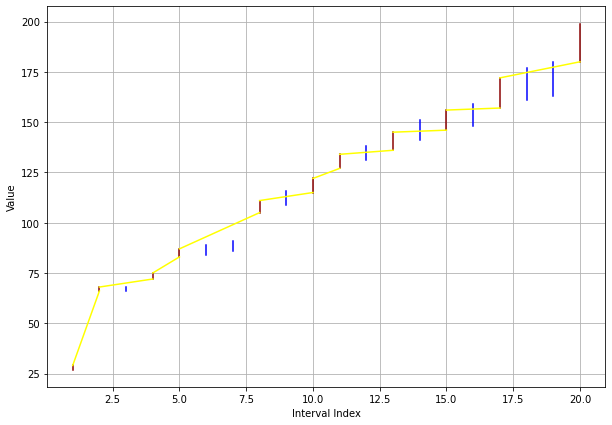

In [6]:
visulization_activity(result_dp,desp='dp')

## Greedy

In [7]:
n,s,f = getDataset(mode='greedy')

A = {0}
k=0
for m in range(1,n):
    if s[m]>=f[k]:
        A = A.union({m})
        k = m 
result_greedy = list(A)

In [8]:
result_greedy

[0, 1, 3, 4, 7, 9, 10, 12, 14, 16, 19]

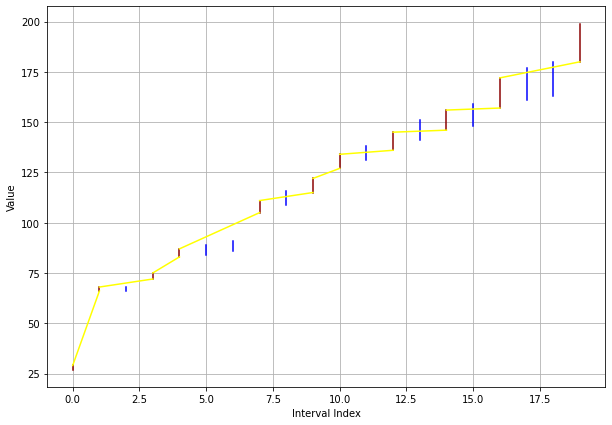

In [9]:
visulization_activity(result_greedy,desp='greedy')

## Tree Searching

In [10]:
n,s,f = getDataset(mode='tree')

def getPossibleNodes(s,f,i,n):
    return [k for k in range(i+1,n) if s[k]>=f[i]]

visit = np.zeros(n)
def naive_activity_selection_tree(s,f,k,n,h):
    if k>=n:
        return h
    #不选
    h_left =  naive_activity_selection_tree(s,f,k+1,n,h)
    
    #选择
    nodes = getPossibleNodes(s,f,k,n)
    if len(nodes)>0:
        h_right = naive_activity_selection_tree(s,f,nodes[0],n,h+1)
    else:
        h_right = h+1
        
    if h_left<h_right:
        visit[k]=1
    return max(h_left,h_right)

In [11]:
print(naive_activity_selection_tree(s,f,0,n,0))
result_tree = np.where(visit==1)[0]

11


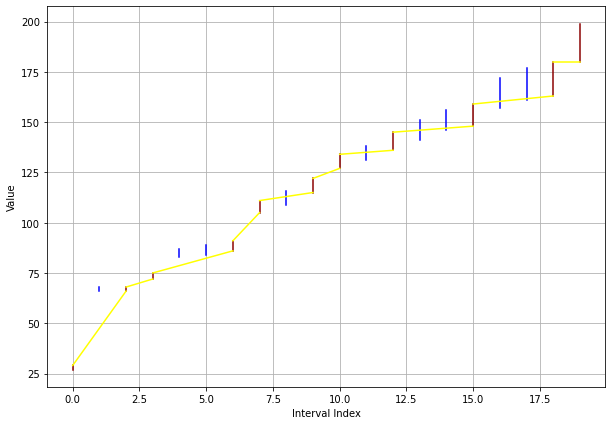

In [12]:
visulization_activity(result_tree,desp='naive_tree_search')

Use mountain hilling to accelerate the algorithm

In [24]:
visit = np.zeros(n)
def getNaiveSolution(s,f,k,n):
    nodes = getPossibleNodes(s,f,k,n)
    if len(nodes)==0:
        return 1
    idx = np.random.randint(len(nodes))
#     print(nodes[idx])
    return getNaiveSolution(s,f,nodes[idx],n)+1

h_bound = getNaiveSolution(s,f,0,n)

def activity_selection_tree(s,f,k,n,h):
    if k>=n:
        return h
    #剪枝
    h_bound = getNaiveSolution(s,f,k,n)
    if np.where(visit==1)[0].shape[0]+n-k<=h_bound:
        return h
    
    #不选
    h_left =  activity_selection_tree(s,f,k+1,n,h)
    
    #选择
    nodes = getPossibleNodes(s,f,k,n)
    if len(nodes)>0:
        h_right = activity_selection_tree(s,f,nodes[0],n,h+1)
    else:
        h_right = h+1
        
    if h_left<h_right:
        visit[k]=1
    return max(h_left,h_right)

In [25]:
print(naive_activity_selection_tree(s,f,0,n,0))
result_tree = np.where(visit==1)[0]

11


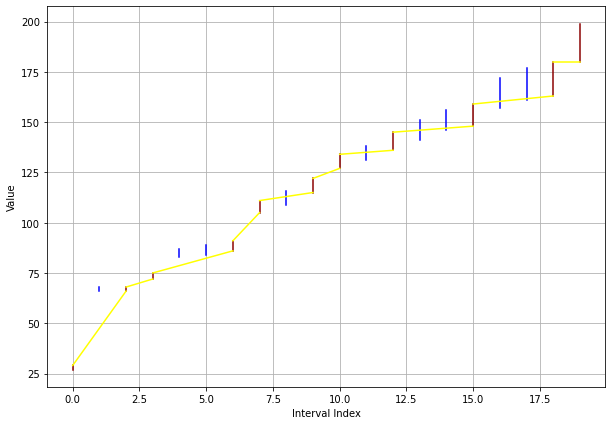

In [26]:
visulization_activity(result_tree,desp='tree_search')